# 📊 Telco Customer Churn Dataset

### Column Explanation

### 🔑 Customer Info
- **`customerID`** → Unique identifier for each customer (not useful for prediction).
- **`gender`** → Customer’s gender (`Male`, `Female`).
- **`SeniorCitizen`** → `0 = No`, `1 = Yes` (whether the customer is a senior citizen).
- **`Partner`** → Customer has a partner (`Yes`/`No`).
- **`Dependents`** → Customer has dependents (`Yes`/`No`).

---

### ⏳ Tenure & Account Details
- **`tenure`** → Number of months the customer has stayed with the company.
- **`Contract`** → Contract type (`Month-to-month`, `One year`, `Two year`).
- **`PaperlessBilling`** → Uses paperless billing (`Yes`/`No`).
- **`PaymentMethod`** → How the customer pays (`Electronic check`, `Mailed check`, `Bank transfer`, `Credit card`).

---

### 📡 Services Signed Up
- **`PhoneService`** → Customer has phone service (`Yes`/`No`).
- **`MultipleLines`** → Multiple phone lines (`Yes`, `No`, `No phone service`).
- **`InternetService`** → Internet service type (`DSL`, `Fiber optic`, `No`).
- **`OnlineSecurity`** → Has online security add-on (`Yes`, `No`, `No internet service`).
- **`OnlineBackup`** → Has online backup service (`Yes`, `No`, `No internet service`).
- **`DeviceProtection`** → Has device protection plan (`Yes`, `No`, `No internet service`).
- **`TechSupport`** → Has technical support (`Yes`, `No`, `No internet service`).
- **`StreamingTV`** → Has TV streaming (`Yes`, `No`, `No internet service`).
- **`StreamingMovies`** → Has movie streaming (`Yes`, `No`, `No internet service`).

---

### 💰 Financial Info
- **`MonthlyCharges`** → Amount charged per month.
- **`TotalCharges`** → Total amount charged (roughly tenure × monthly charges).

---

### 🎯 Target Variable
- **`Churn`** → Did the customer leave the company in the last month? (`Yes`/`No`).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import math

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler

from sklearn.model_selection import RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, roc_auc_score

### EDA

In [3]:
df = pd.read_csv('/Users/vikrmadityamishra/Downloads/Python/DataSets/Telco Customer Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Manipulation 

In [9]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


On deep analysis, we can find some indirect missingness in our data (which can be in form of blankspaces). Let's see that!

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Here we see that the TotalCharges has 11 missing values. Let's check this data.

In [11]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- It can also be noted that the **`tenure`** column contains `0` for some entries even though the 
  **`MonthlyCharges`** column is not empty.  
- This indicates that these customers have just joined and were billed immediately.  
- Let's check if there are any other `0` values in the **`tenure`** column.

In [12]:
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

- There are no additional missing values in the Tenure column.
- Let's replace the missing columns with 0.0 as the total charges will be 0 because the customer has joined recently(tenure = 0 | tenure x monthly = 0).

In [13]:
df['TotalCharges'] = df['TotalCharges'].fillna(0.0)

In [14]:
df[df['tenure'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [15]:
df.shape

(7043, 20)

In [16]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Checking The Class Distribution of The Target Column

In [17]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [18]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0 : 'No', 1 : 'Yes'})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Visualisation

In [19]:
numerical_col = ['MonthlyCharges', 'TotalCharges', 'tenure']
df[numerical_col].describe()

,MonthlyCharges,TotalCharges,tenure
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.734304,32.371149
std,30.090047,2266.794470,24.559481
min,18.250000,0.000000,0.000000
25%,35.500000,398.550000,9.000000
50%,70.350000,1394.550000,29.000000
75%,89.850000,3786.600000,55.000000
max,118.750000,8684.800000,72.000000


#### Univariate

##### HistoGram

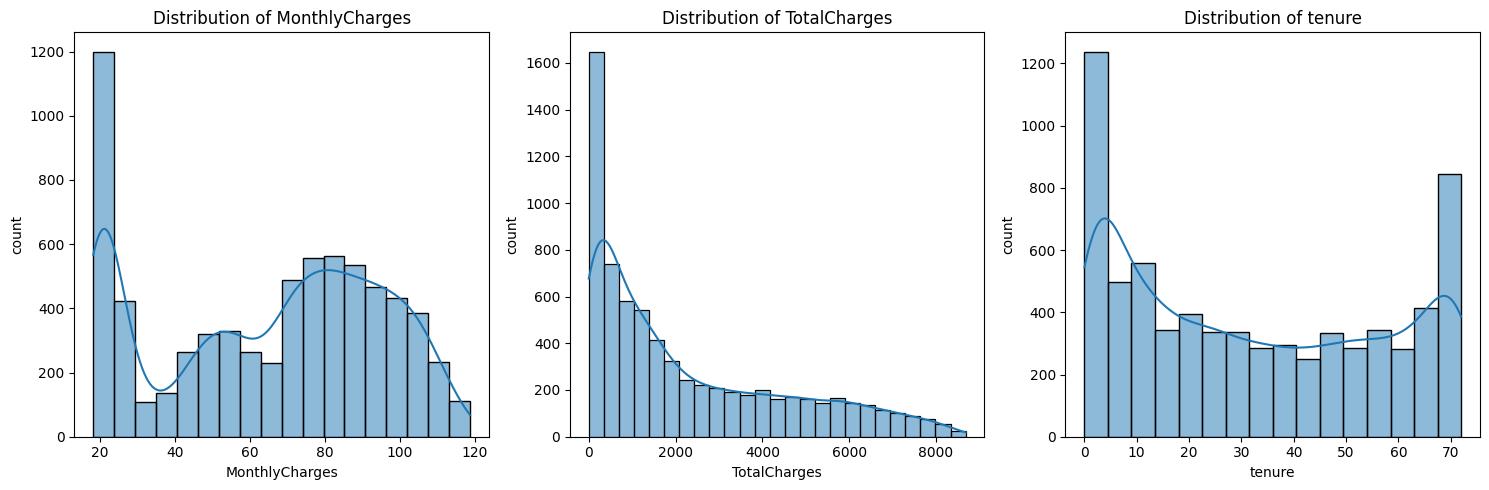

In [20]:
n = len(numerical_col)
cols = 3
rows = math.ceil(n / cols)
plt.figure(figsize=(cols * 5, rows * 5))

for i, col in enumerate(numerical_col, 1):
    plt.subplot(rows, cols, i)          # <- use `cols` (integer), not `col` (string)
    sns.histplot(df[col], kde=True)   # dropna to avoid issues
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('count')

plt.tight_layout()
plt.show()

##### BoxPlot

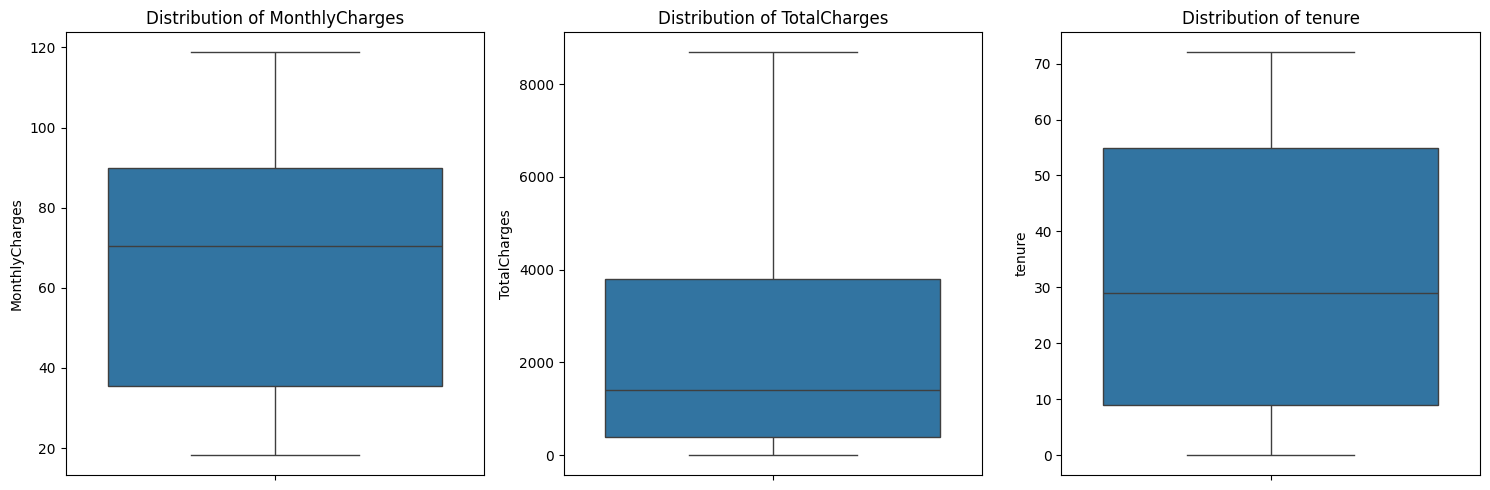

In [21]:
n = len(numerical_col)
cols = 3
rows = math.ceil(n / cols)
plt.figure(figsize=(cols * 5, rows * 5))

for i, col in enumerate(numerical_col, 1):   # start from 1
    plt.subplot(rows, cols, i)               # use rows & cols
    sns.boxplot(y=df[col])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [22]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Bivariate

In [23]:
categorical_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

##### CountPlot

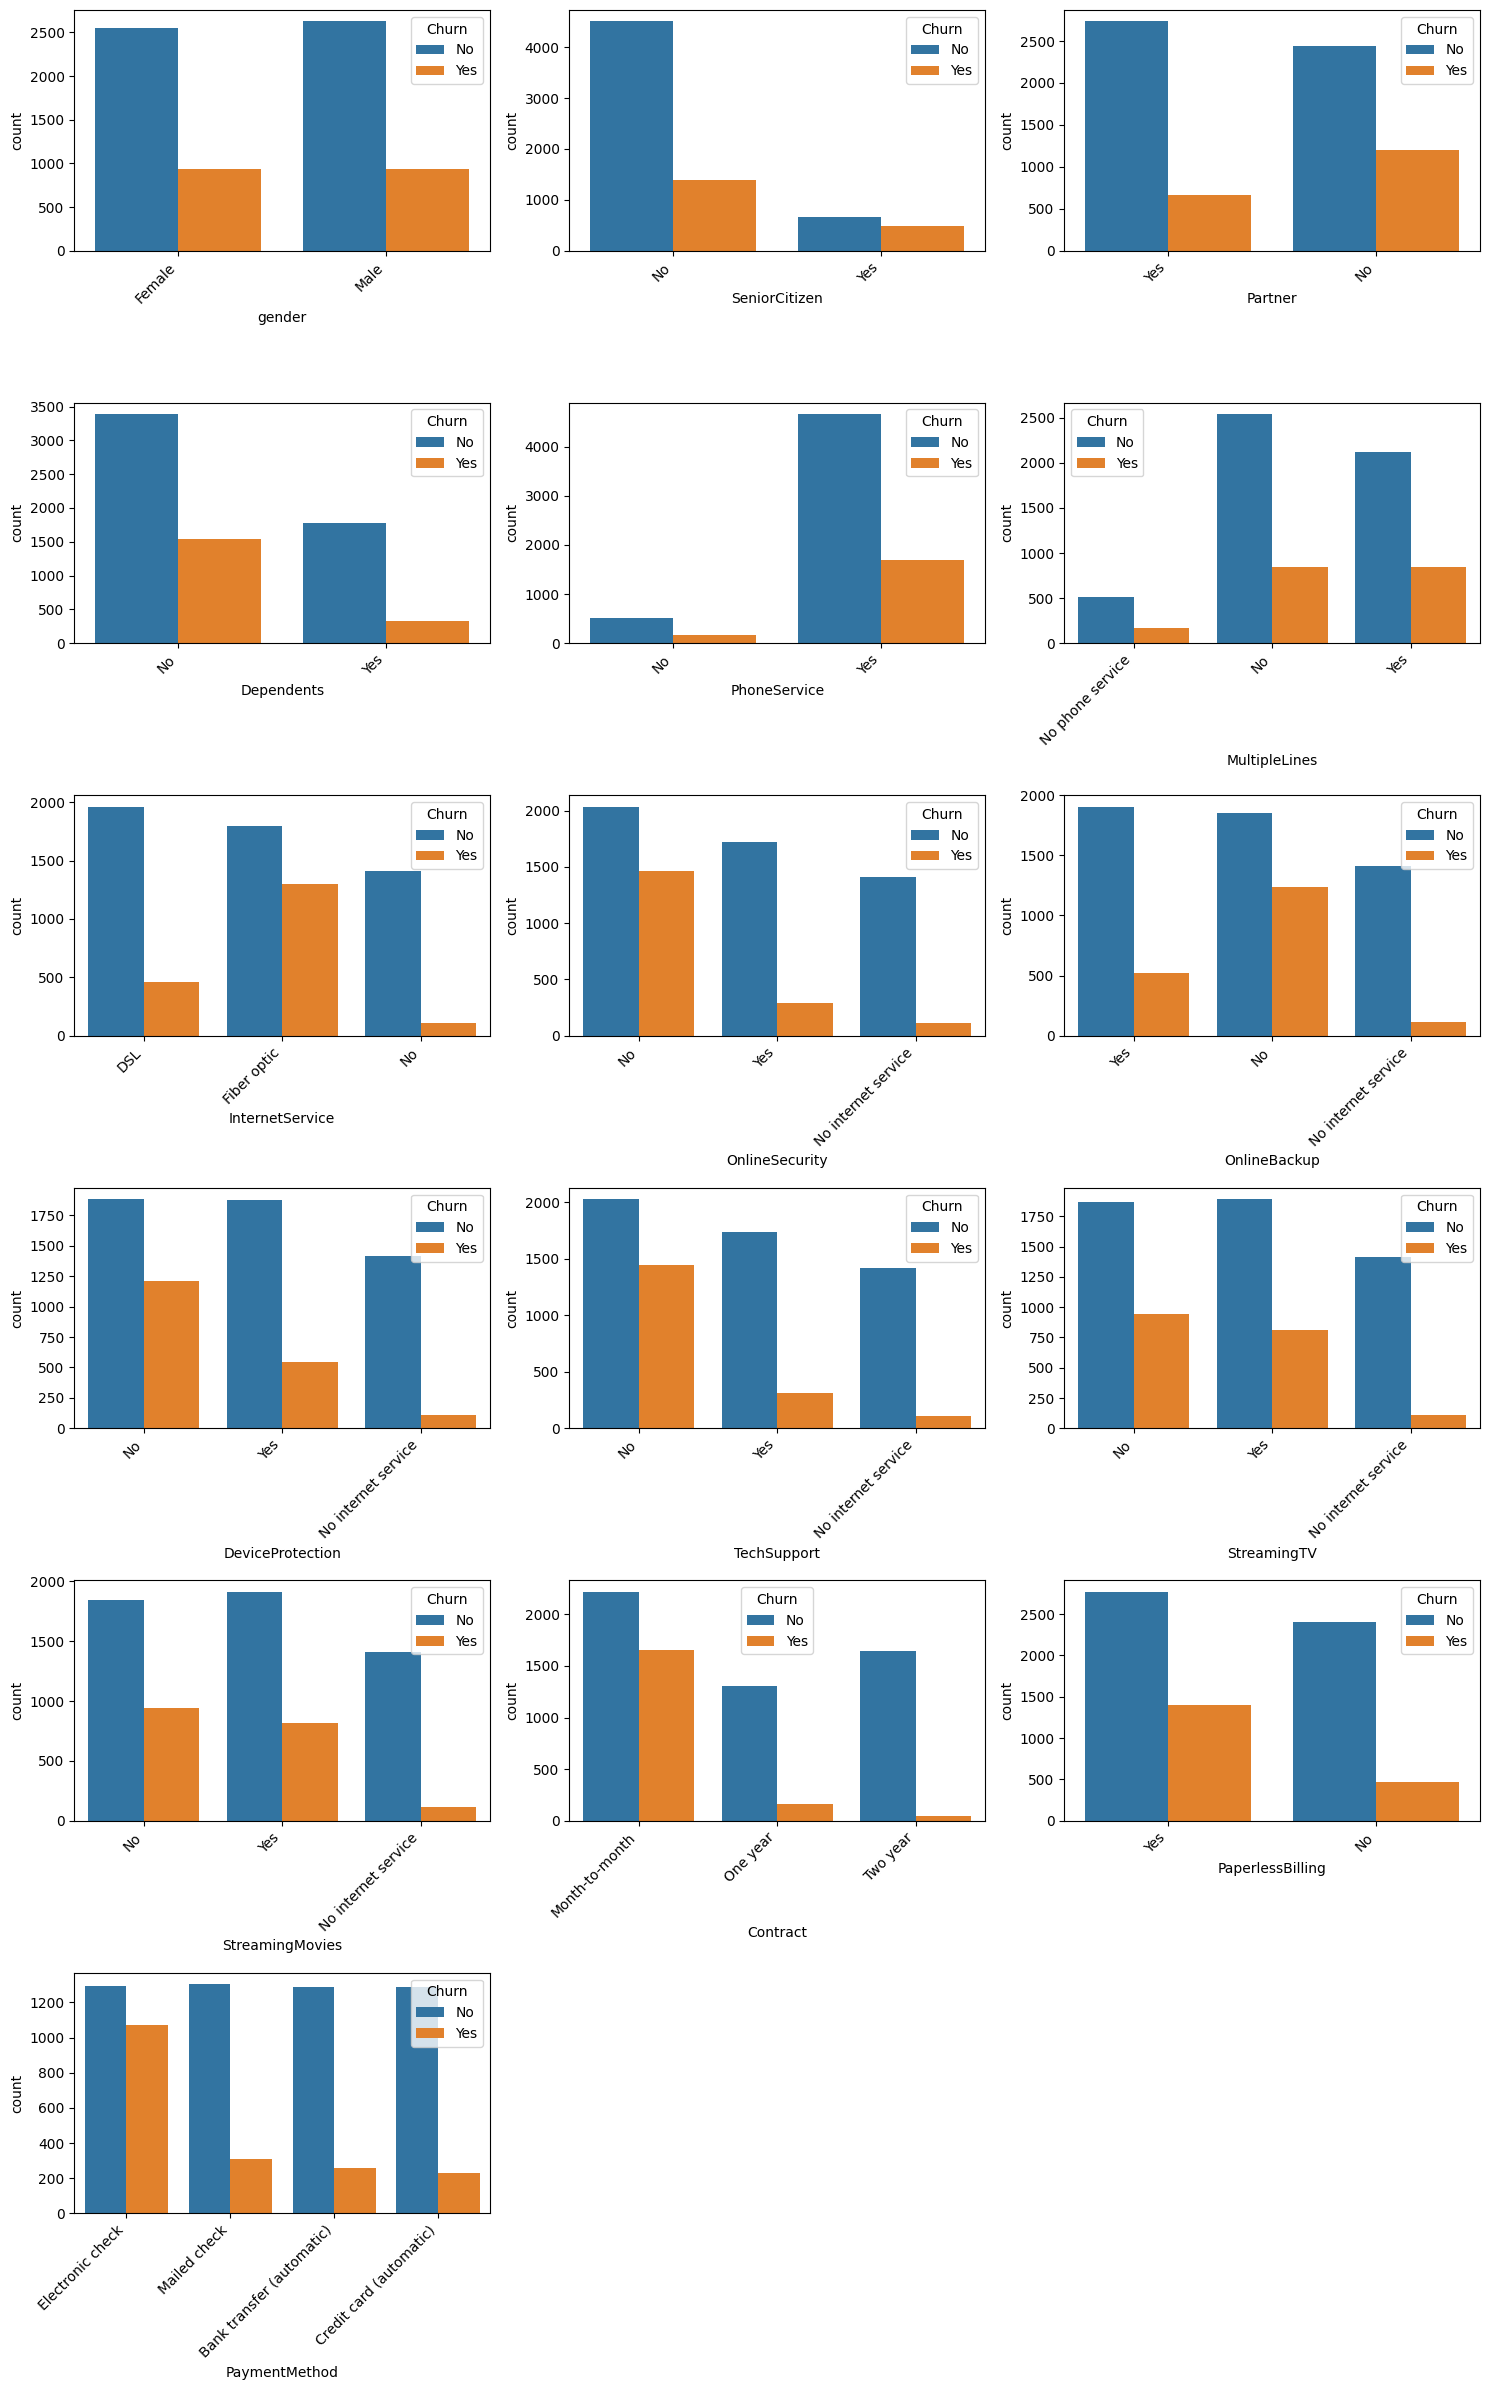

In [24]:
n = len(categorical_col)
cols = 3
rows = math.ceil(n / cols)
plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(categorical_col, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col, hue='Churn')   # correct usage
    # plt.title(col)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

##### BoxPlot

In [25]:
from scipy import stats

# Separate churn groups
churn_yes = df[df['Churn'] == 'Yes']
churn_no = df[df['Churn'] == 'No']

# Run t-tests
for col in ['MonthlyCharges', 'TotalCharges', 'tenure']:
    t_stat, p_val = stats.ttest_ind(churn_yes[col], churn_no[col], equal_var=False)
    print(f"{col}: t={t_stat:.2f}, p={p_val:.5f}")

MonthlyCharges: t=18.41, p=0.00000
TotalCharges: t=-18.71, p=0.00000
tenure: t=-34.82, p=0.00000


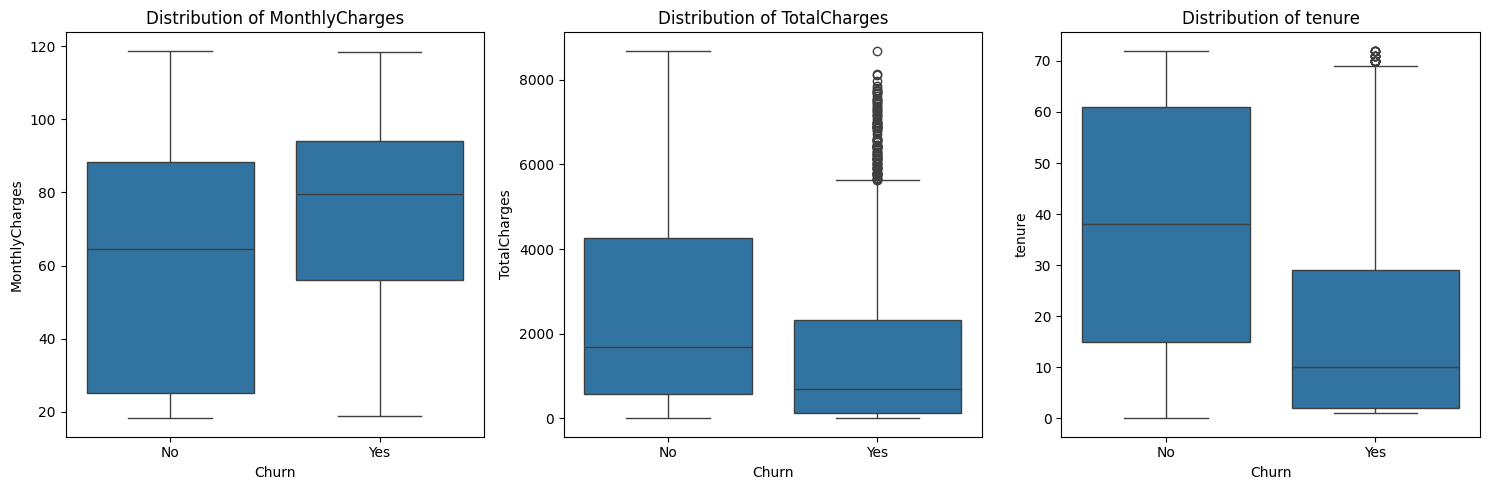

In [26]:
n = len(numerical_col)
cols = 3
rows = math.ceil(n / cols)
plt.figure(figsize=(cols * 5, rows * 5))

for i, col in enumerate(numerical_col, 1):   # start from 1
    plt.subplot(rows, cols, i)               # use rows & cols
    sns.boxplot(y=df[col], x = df['Churn'])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

##### ViolinPlot

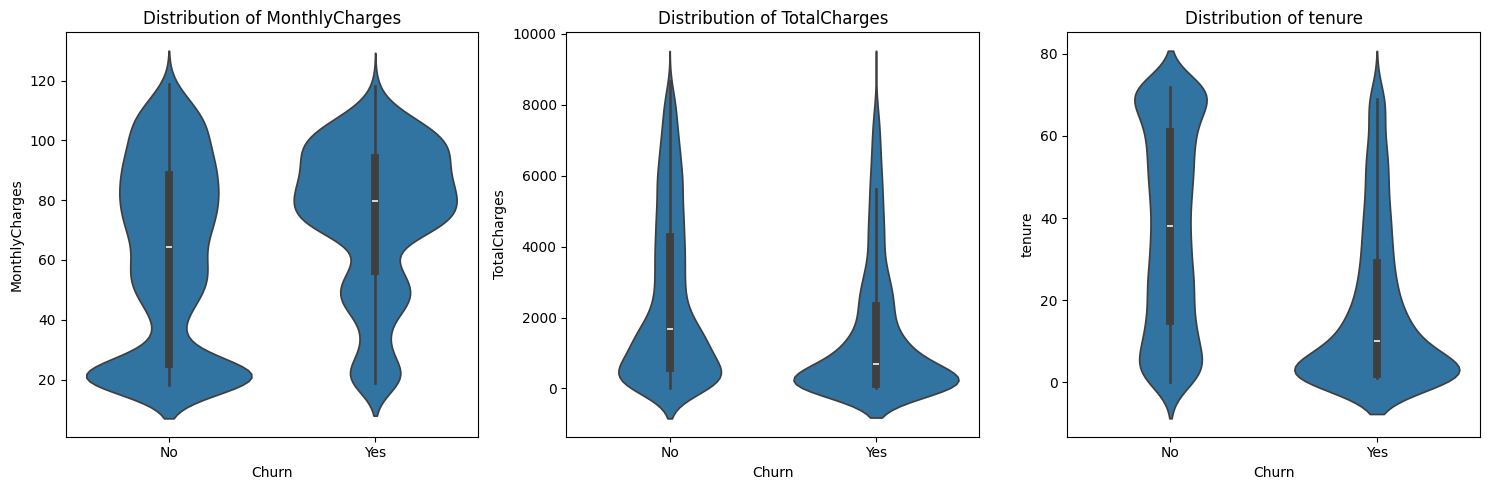

In [27]:
n = len(numerical_col)
cols = 3
rows = math.ceil(n / cols)
plt.figure(figsize=(cols * 5, rows * 5))

for i, col in enumerate(numerical_col, 1):   # start from 1
    plt.subplot(rows, cols, i)               # use rows & cols
    sns.violinplot(y=df[col], x = df['Churn'])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

#### Correlation

In [28]:
df[numerical_col].corr()

,MonthlyCharges,TotalCharges,tenure
MonthlyCharges,1.000000,0.651174,0.247900
TotalCharges,0.651174,1.000000,0.826178
tenure,0.247900,0.826178,1.000000


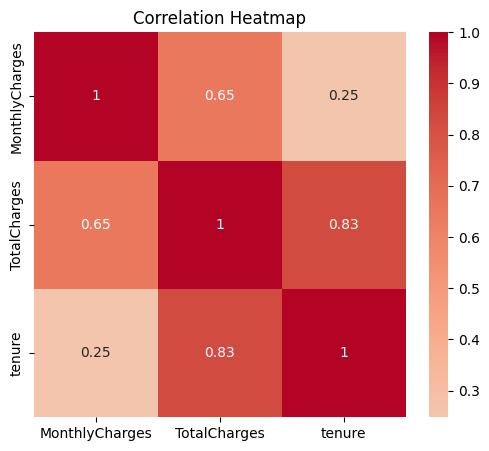

In [29]:
plt.figure(figsize=(6,5))
sns.heatmap(df[numerical_col].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

##### Correlation wrt Churn

In [30]:
df_copy = df.copy()

In [31]:
# Map Yes/No to 1/0 robustly (handle stray whitespace/case)
df_copy['Churn'] = df_copy['Churn'].astype(str).str.strip().str.capitalize().map({'Yes':1, 'No':0})

# Converting numeric-looking object columns to numeric (coerce invalid to NaN)
for col in ['TotalCharges','MonthlyCharges','tenure']:
    if col in df_copy.columns:
        df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')

# Correlation on numeric columns only
numeric_df = df_copy.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

# Debug: show available numeric columns in the corr matrix
print("Numeric columns used for correlation:\n", numeric_df.columns.tolist())

# Correlation with Churn
corr_with_churn = corr_matrix['Churn'].sort_values(ascending=False)

Numeric columns used for correlation:
 ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [32]:
print("\nCorrelation with Churn:\n", corr_with_churn)


Correlation with Churn:
 Churn             1.000000
MonthlyCharges    0.193356
TotalCharges     -0.198324
tenure           -0.352229
Name: Churn, dtype: float64


### Data Preprocessing & Model Evaluation

#### Preprocessing

Splitting The Data into Train & Test Sets

In [33]:
X = df.drop(columns = ['Churn'])
y = df['Churn']

Encoding the Target Variable

In [34]:
le = LabelEncoder()

y = le.fit_transform(y)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
for col in categorical_col:
    print(f'{col}:\n{df[col].unique()}')
    print('-'*50)

gender:
['Female' 'Male']
--------------------------------------------------
SeniorCitizen:
['No' 'Yes']
--------------------------------------------------
Partner:
['Yes' 'No']
--------------------------------------------------
Dependents:
['No' 'Yes']
--------------------------------------------------
PhoneService:
['No' 'Yes']
--------------------------------------------------
MultipleLines:
['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService:
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity:
['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup:
['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection:
['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport:
['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV:
['No' 

In [37]:
BINARY_COLS = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen'
]

OHE_COLS = [
    'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'
]

NUMERIC_COLS = ['tenure', 'MonthlyCharges', 'TotalCharges']

Encoding & Transforming all the Columns

In [38]:
# Build ColumnTransformer
ct = ColumnTransformer(
    transformers=[
        ("le", OrdinalEncoder(), BINARY_COLS),   # binary → 0/1
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False), OHE_COLS),  # categorical → one-hot
        ("scale", StandardScaler(), NUMERIC_COLS),   # numeric → scaled
    ],
    remainder="passthrough"  # keep untouched columns if any
)

# Fit on training data and transform
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed  = ct.transform(X_test)

# get the names (sklearn >= 1.0)
raw_names = ct.get_feature_names_out()

# Convert back to DataFrame with proper column names
clean_names = [name.split('__', 1)[1] if '__' in name else name for name in raw_names]
X_train_transformed = pd.DataFrame(X_train_transformed, columns=clean_names, index=X_train.index)
X_test_transformed  = pd.DataFrame(X_test_transformed,  columns=clean_names, index=X_test.index)

Balancing the Imbalance in the Training Set

In [39]:
print(pd.Series(y_train).value_counts())

0    4138
1    1496
Name: count, dtype: int64


In [40]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)

X_train_smote, y_train_smote = smote.fit_resample(X_train_transformed, y_train)

In [41]:
from collections import defaultdict

# Step 1: Separate numeric vs categorical dummy columns
cat_dummy_cols = [col for col in X_train_smote.columns if col not in NUMERIC_COLS]

# Step 3: Group categorical columns by their prefix
# e.g., 'Contract_Month-to-month', 'Contract_One year' → group 'Contract'
groups = defaultdict(list)
for col in cat_dummy_cols:
    prefix = col.split('_')[0]   # take everything before the first underscore
    groups[prefix].append(col)

for prefix, cols in groups.items():
    if len(cols) > 2:  # multi-class
        # use idxmax directly on fractional values
        def one_hot_argmax(row):
            out = pd.Series(0, index=row.index)
            out[row.idxmax()] = 1
            return out
        X_train_smote[cols] = X_train_smote[cols].apply(one_hot_argmax, axis=1)
    else:  # binary
        # rounding is enough
        X_train_smote[cols] = X_train_smote[cols].round().astype(int)

# Final overwrite
X_train_transformed = X_train_smote.copy()
y_train = y_train_smote.copy()

#### Model Evaluations and Prediction AI


---- LogisticRegression ----
LogisticRegression CV Acc: 0.77
Accuracy: 0.7558552164655784
ROC-AUC: 0.8615770596333598
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



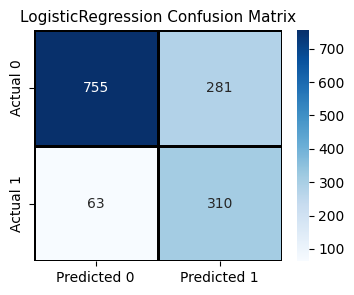


---- KNeighborsClassifier ----
KNeighborsClassifier CV Acc: 0.77
Accuracy: 0.723207948899929
ROC-AUC: 0.8254526069539474
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1036
           1       0.49      0.82      0.61       373

    accuracy                           0.72      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.72      0.74      1409



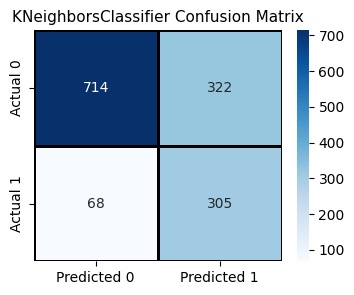


---- SVC ----
SVC CV Acc: 0.78
Accuracy: 0.7537260468417317
ROC-AUC: 0.8456361857836389
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1036
           1       0.52      0.79      0.63       373

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.77      1409



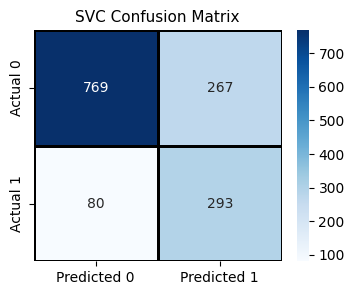


---- DecisionTreeClassifier ----
DecisionTreeClassifier CV Acc: 0.77
Accuracy: 0.7104329311568488
ROC-AUC: 0.6585340606788328
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1036
           1       0.46      0.55      0.50       373

    accuracy                           0.71      1409
   macro avg       0.64      0.66      0.65      1409
weighted avg       0.73      0.71      0.72      1409



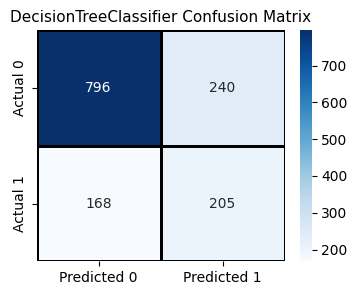


---- RandomForestClassifier ----
RandomForestClassifier CV Acc: 0.78
Accuracy: 0.7622427253371186
ROC-AUC: 0.8616288157172876
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1036
           1       0.53      0.80      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



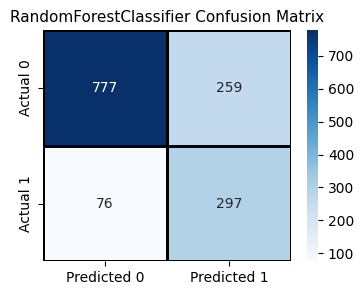


---- AdaBoostClassifier ----
AdaBoostClassifier CV Acc: 0.77
Accuracy: 0.7459190915542938
ROC-AUC: 0.8582866665976585
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.51      0.83      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



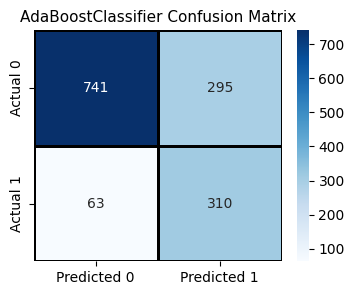


---- GradientBoostingClassifier ----
GradientBoostingClassifier CV Acc: 0.79
Accuracy: 0.7693399574166075
ROC-AUC: 0.8588469262061755
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1036
           1       0.54      0.81      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409



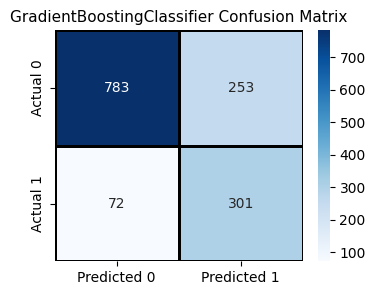


---- XGBClassifier ----
XGBClassifier CV Acc: 0.81
Accuracy: 0.7665010645848119
ROC-AUC: 0.842112890370263
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1036
           1       0.54      0.73      0.62       373

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.77      0.78      1409



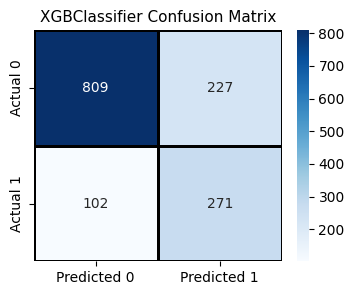

In [42]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=11),
    "SVC": SVC(probability=True, random_state=1),  # probability=True to enable predict_proba
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(
        n_estimators=500, oob_score=True, n_jobs=-1, random_state=50, max_features='sqrt', max_leaf_nodes=30
    ),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "GradientBoost": GradientBoostingClassifier(random_state=42),
    "XGBoost" : XGBClassifier(use_label_encoder=False, eval_metric="logloss", n_estimators = 200, max_depth = 5, learning_rate = 0.1)
}

def evaluate_model(m, Xtr, ytr, Xte, yte,
                        cv_folds=3, scoring='accuracy', n_jobs=-1,
                        random_state=42, verbose=True):
    m.fit(Xtr, ytr)

    ypred = m.predict(Xte)
    yprob = m.predict_proba(Xte)[:,1] if hasattr(m, 'predict_proba') else None

    print('\n----', m.__class__.__name__, '----')

    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=random_state)
    score = cross_val_score(m, Xtr, ytr, cv = cv, scoring = 'accuracy', n_jobs = n_jobs)

    print(f'{m.__class__.__name__} CV Acc: {np.mean(score):.2f}')
    print('Accuracy:', accuracy_score(yte, ypred))

    if yprob is not None:
        print('ROC-AUC:', roc_auc_score(yte, yprob))
    print(classification_report(yte, ypred))

    cm = confusion_matrix(yte, ypred)
    plt.figure(figsize = (4,3))
    sns.heatmap(cm, annot = True,  fmt="d", cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
    linecolor="k", linewidths=2)
    plt.title(m.__class__.__name__ + ' Confusion Matrix', fontsize = 11)
    plt.show()

for name, mod in models.items():
    evaluate_model(mod, X_train_transformed, y_train, X_test_transformed, y_test)

---- Voting Classifier ----
Voting Classifier CV Acc: 0.79
Accuracy: 0.758694109297374
ROC-AUC: 0.8638750297597483
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       0.53      0.81      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



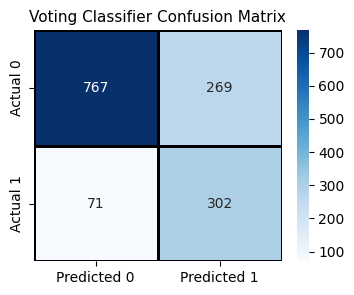

In [43]:
##### Voting Classifier
from sklearn.ensemble import VotingClassifier

clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()

model_Voting = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
model_Voting.fit(X_train_transformed, y_train)
y_predVC = model_Voting.predict(X_test_transformed)

print(f'---- Voting Classifier ----')

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model_Voting, X_train_transformed, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
print(f'Voting Classifier CV Acc: {np.mean(score):.2f}')

print(f'Accuracy: {accuracy_score(y_test, y_predVC)}')

yprob = model_Voting.predict_proba(X_test_transformed)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, yprob))

print(f'Classification Report: {classification_report(y_test, y_predVC)}')

cm_VC = confusion_matrix(y_test, y_predVC)

plt.figure(figsize = (4,3))
sns.heatmap(cm_VC, annot = True,  fmt="d", cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
    linecolor="k", linewidths=2)

plt.title('Voting Classifier Confusion Matrix', fontsize = 11)
plt.show()

#### Model Evaluations and Prediction

##### Logistic Regression

In [44]:
model_lr = LogisticRegression()
model_lr.fit(X_train_transformed, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [45]:
y_predLR = model_lr.predict(X_test_transformed)
y_predLR

array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [46]:
y_test

array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [47]:
print(f'Accuracy Score: {accuracy_score(y_test, y_predLR)}')

Accuracy Score: 0.7558552164655784


In [48]:
print(f'Classification Report: {classification_report(y_test, y_predLR)}')

Classification Report:               precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



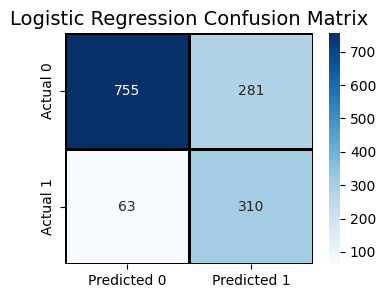

In [49]:
cm_lr = confusion_matrix(y_test, y_predLR)

plt.figure(figsize=(4,3))
sns.heatmap(
    cm_lr, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
    linecolor="k", linewidths=2
)

plt.title("Logistic Regression Confusion Matrix", fontsize=14)
plt.show()

##### KNN

In [50]:
knn_model = KNeighborsClassifier(n_neighbors = 11)

knn_model.fit(X_train_transformed, y_train)

,n_neighbors,11
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [51]:
y_predKNN = knn_model.predict(X_test_transformed)
y_predKNN

array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [52]:
y_test

array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [53]:
accuracy_knn = accuracy_score(y_predKNN, y_test)
print(f'KNN Accuracy: {accuracy_knn}')

KNN Accuracy: 0.723207948899929


In [54]:
print(f'{classification_report(y_test, y_predKNN)}')

              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1036
           1       0.49      0.82      0.61       373

    accuracy                           0.72      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.72      0.74      1409



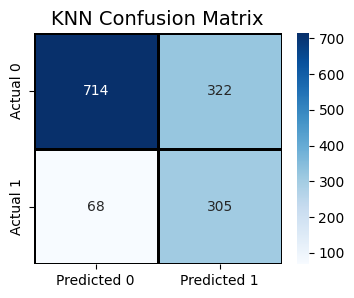

In [55]:
cm_KNN = confusion_matrix(y_test, y_predKNN)

plt.figure(figsize=(4,3))
sns.heatmap(
    cm_KNN, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
    linecolor="k", linewidths=2
)

plt.title("KNN Confusion Matrix", fontsize=14)
plt.show()

In [56]:
tn, fp, fn, tp = cm_KNN.ravel()

print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")

TP: 305, TN: 714, FP: 322, FN: 68


##### SVC

In [57]:
svc_model = SVC(random_state = 1)

svc_model.fit(X_train_transformed, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [58]:
y_predSVC = svc_model.predict(X_test_transformed)
y_predSVC

array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [59]:
y_test

array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [60]:
print(f'Accuracy Score: {accuracy_score(y_predSVC, y_test)}')

Accuracy Score: 0.7537260468417317


In [61]:
print(f'Classifcation Report: {classification_report(y_test, y_predSVC)}')

Classifcation Report:               precision    recall  f1-score   support

           0       0.91      0.74      0.82      1036
           1       0.52      0.79      0.63       373

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.77      1409



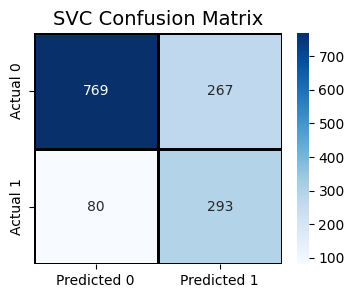

In [62]:
cm_SVC = confusion_matrix(y_test,y_predSVC)

plt.figure(figsize=(4,3))
sns.heatmap(
    cm_SVC, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
    linecolor="k", linewidths=2
)

plt.title("SVC Confusion Matrix", fontsize=14)
plt.show()

##### Decision Tree

In [63]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_transformed, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [64]:
y_predDT = model_DT.predict(X_test_transformed)
y_predDT

array([1, 0, 1, ..., 0, 0, 0], shape=(1409,))

In [65]:
print(f'Accuracy Score: {accuracy_score(y_test, y_predDT)}')

Accuracy Score: 0.6997870830376153


In [66]:
print(f'Classification Report: {classification_report(y_test, y_predDT)}')

Classification Report:               precision    recall  f1-score   support

           0       0.82      0.75      0.79      1036
           1       0.45      0.55      0.49       373

    accuracy                           0.70      1409
   macro avg       0.64      0.65      0.64      1409
weighted avg       0.72      0.70      0.71      1409



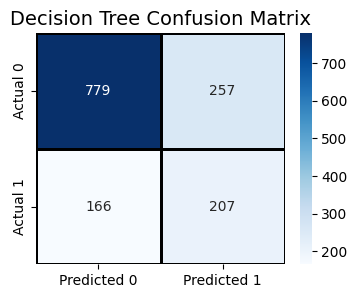

In [67]:
cm_DT = confusion_matrix(y_test, y_predDT)

plt.figure(figsize = (4,3))
sns.heatmap(cm_DT, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
    linecolor="k", linewidths=2)

plt.title("Decision Tree Confusion Matrix", fontsize=14)
plt.show()

##### Random Forest

In [68]:
model_rf = RandomForestClassifier(n_estimators = 500, oob_score = True, n_jobs = -1, 
                                  random_state = 50, max_features = 'sqrt', max_leaf_nodes = 30)

model_rf.fit(X_train_transformed, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,30
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [69]:
y_predRF = model_rf.predict(X_test_transformed)
y_predRF

array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [70]:
y_test

array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [71]:
print(f'Accuracy Score RF: {accuracy_score(y_predRF, y_test)}')

Accuracy Score RF: 0.7622427253371186


In [72]:
confusion_matrix(y_test, y_predRF)

array([[777, 259],
       [ 76, 297]])

In [73]:
print(f"Classification Report: {classification_report(y_predRF, y_test)}")

Classification Report:               precision    recall  f1-score   support

           0       0.75      0.91      0.82       853
           1       0.80      0.53      0.64       556

    accuracy                           0.76      1409
   macro avg       0.77      0.72      0.73      1409
weighted avg       0.77      0.76      0.75      1409



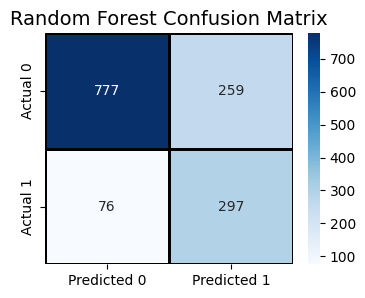

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predRF)

plt.figure(figsize=(4,3))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
    linecolor="k", linewidths=2
)

plt.title("Random Forest Confusion Matrix", fontsize=14)
plt.show()

##### Ada Boost Classifier

In [75]:
model_ada = AdaBoostClassifier()
model_ada.fit(X_train_transformed, y_train)

,estimator,None
,n_estimators,50
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,None


In [76]:
y_predADA = model_ada.predict(X_test_transformed)
y_predADA

array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [77]:
print(f'Accuracy Score: {accuracy_score(y_test, y_predADA)}')

Accuracy Score: 0.7459190915542938


In [78]:
print(f'Classification Report: {classification_report(y_test, y_predADA)}')

Classification Report:               precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.51      0.83      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



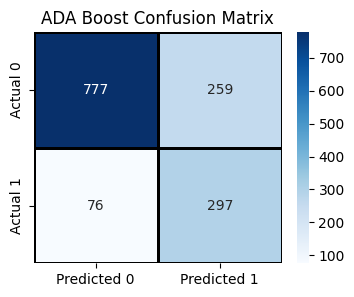

In [79]:
cm_ADA = confusion_matrix(y_test, y_predADA)

plt.figure(figsize = (4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
    linecolor="k", linewidths=2)

plt.title('ADA Boost Confusion Matrix', fontsize = 12)
plt.show()

##### Gradient Boosting Classifier

In [80]:
model_GB = GradientBoostingClassifier()
model_GB.fit(X_train_transformed, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [81]:
y_predGB = model_GB.predict(X_test_transformed)
y_predGB

array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [82]:
y_test

array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [83]:
print(f'Accuracy Score: {accuracy_score(y_test, y_predGB)}')

Accuracy Score: 0.7693399574166075


In [84]:
print(f'Classification Report: {classification_report(y_test, y_predGB)}')

Classification Report:               precision    recall  f1-score   support

           0       0.92      0.76      0.83      1036
           1       0.54      0.81      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.77      0.78      1409



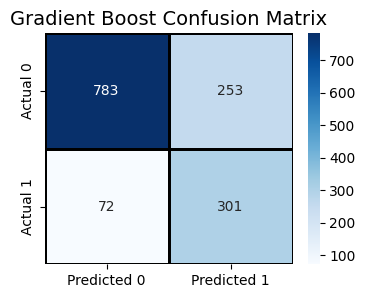

In [85]:
cm_GB = confusion_matrix(y_test, y_predGB)

plt.figure(figsize = (4,3))
sns.heatmap(cm_GB, annot = True,  fmt="d", cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
    linecolor="k", linewidths=2)

plt.title('Gradient Boost Confusion Matrix', fontsize = 14)
plt.show()

##### XG Boost

In [86]:
model_XGB = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5],
    "learning_rate": [0.01, 0.1],
}

random_search = RandomizedSearchCV(
    model_XGB,
    param_distributions=param_grid,
    n_iter=10,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

In [87]:
random_search.fit(X_train_transformed, y_train)  
print("Best params:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best params: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
Best score: 0.8135606491819548


In [88]:
y_predRSCV = random_search.predict(X_test_transformed)
y_predRSCV

array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [89]:
y_test

array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [90]:
print(f'Accuracy Score: {accuracy_score(y_test, y_predRSCV)}')

Accuracy Score: 0.7665010645848119


In [91]:
print(f'Classfication Report: {classification_report(y_test, y_predRSCV)}')

Classfication Report:               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1036
           1       0.54      0.73      0.62       373

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.77      0.78      1409



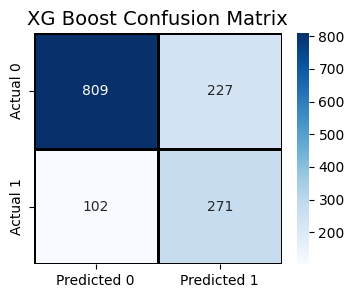

In [92]:
cm_RSCV = confusion_matrix(y_test, y_predRSCV)

plt.figure(figsize = (4,3))
sns.heatmap(cm_RSCV, annot = True,  fmt="d", cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
    linecolor="k", linewidths=2)

plt.title('XG Boost Confusion Matrix', fontsize = 14)
plt.show()

##### Voting Classifier

In [93]:
from sklearn.ensemble import VotingClassifier

clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()

model_Voting = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
model_Voting.fit(X_train_transformed, y_train)

,estimators,"[('gbc', ...), ('lr', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'


In [94]:
y_predVC = model_Voting.predict(X_test_transformed)
y_predVC

array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [95]:
y_test

array([1, 0, 0, ..., 0, 0, 1], shape=(1409,))

In [96]:
print(f'Accuracy Score: {accuracy_score(y_test, y_predVC)}')

Accuracy Score: 0.758694109297374


In [97]:
print(f'Classification Report: {classification_report(y_test, y_predVC)}')

Classification Report:               precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       0.53      0.81      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



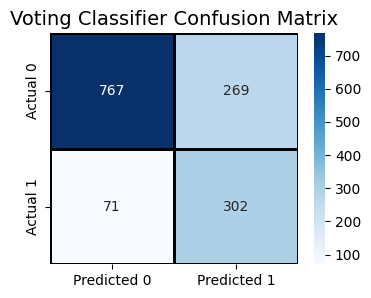

In [98]:
cm_VC = confusion_matrix(y_test, y_predVC)

plt.figure(figsize = (4,3))
sns.heatmap(cm_VC, annot = True,  fmt="d", cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"],
    linecolor="k", linewidths=2)

plt.title('Voting Classifier Confusion Matrix', fontsize = 14)
plt.show()

### Pipline Way

In [99]:
# classifiers = {
#     "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
#     "DecisionTree": DecisionTreeClassifier(random_state=42),
#     "RandomForest": RandomForestClassifier(random_state=42, n_jobs=-1),
#     "KNeighbors": KNeighborsClassifier(),
#     "SVC": SVC(probability=True, random_state=42),
#     "AdaBoost": AdaBoostClassifier(random_state=42),
#     "GradientBoosting": GradientBoostingClassifier(random_state=42),
#     "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
# }

# # Define param grids 
# param_grids = {
#     "LogisticRegression": {"C": np.logspace(-3, 3, 7), "solver": ["lbfgs", "saga"]},
#     "DecisionTree": {"max_depth": [None, 5, 10, 20], "min_samples_split": [2, 5, 10]},
#     "RandomForest": {"n_estimators": [100, 200], "max_depth": [None, 10, 20]},
#     "ExtraTrees": {"n_estimators": [100, 200], "max_depth": [None, 10, 20]},
#     "KNeighbors": {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]},
#     "SVC": {"C": [0.1, 1, 10], "kernel": ["rbf", "poly"], "gamma": ["scale", "auto"]},
#     "GaussianNB": {"var_smoothing": np.logspace(-9, -6, 5)},
#     "MLP": {"hidden_layer_sizes": [(50,), (100,)], "activation": ["relu", "tanh"]},
#     "AdaBoost": {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1, 1]},
#     "GradientBoosting": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1]},
#     "XGBoost": {"n_estimators": [100, 200], "max_depth": [3, 5], "learning_rate": [0.01, 0.1]},
# }

# results = []

# for name, clf in classifiers.items():
#     print(f"\n=== Tuning {name} ===")
#     param_grid = param_grids.get(name, {})
#     if not param_grid:
#         print("No param grid, using default model.")
#         clf.fit(X_train_transformed, y_train)
#         results.append({"model": name, "best_score": None, "best_params": None})
#         continue
    
#     search = RandomizedSearchCV(
#         clf,
#         param_distributions=param_grid,
#         n_iter=10,
#         scoring="accuracy",
#         cv=5,
#         n_jobs=-1,
#         random_state=42,
#         verbose=1
#     )
#     search.fit(X_train_transformed, y_train)
#     best_model = search.best_estimator_
#     print("Best params:", search.best_params_)
#     print("Best CV score:", search.best_score_)

#     # --- Evaluate on test set ---
#     y_pred = best_model.predict(X_test_transformed)
    
#     # Some classifiers (like SVC with probability=False) don’t have predict_proba
#     try:
#         y_proba = best_model.predict_proba(X_test_transformed)[:, 1]
#         roc_auc = roc_auc_score()(y_test, y_proba)
#     except Exception:
#         roc_auc = None
    
#     acc = accuracy_score(y_test, y_pred)
#     prec = precision_score(y_test, y_pred, zero_division=0)
#     rec = recall_score(y_test, y_pred, zero_division=0)
#     f1 = f1_score(y_test, y_pred, zero_division=0)
#     cm = confusion_matrix(y_test, y_pred)
    
#     results.append({
#         "model": name,
#         "accuracy": acc,
#         "precision": prec,
#         "recall": rec,
#         "f1": f1,
#         "roc_auc": roc_auc,
#         "confusion_matrix": cm
#     })

# # Convert results into a DataFrame (except confusion_matrix, since it's a 2D array)
# import pandas as pd
# results_df = pd.DataFrame([{k:v for k,v in r.items() if k!="confusion_matrix"} for r in results])

# print("\n=== Summary Metrics ===")
# print(results_df)

#### Diffent Version

In [100]:
# BINARY_COLS = [
#     'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'SeniorCitizen'
# ]

# OHE_COLS = [
#     'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',
#     'OnlineBackup', 'DeviceProtection', 'TechSupport',
#     'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'
# ]

# NUMERIC_COLS = ['tenure', 'MonthlyCharges', 'TotalCharges']

# from sklearn.model_selection import train_test_split
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# # Classifiers (from your imports)
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier

# # -------------------------
# # USER: replace these with your real lists
# BINARY_COLS = ["gender", "Partner"]        # example binary columns
# OHE_COLS    = ["InternetService", "Contract"]  # example multi-class columns
# NUMERIC_COLS = ["tenure", "MonthlyCharges"]    # example numeric columns
# TARGET = "Churn"  # replace with your target column name
# # -------------------------

# def evaluate_classifiers(df, target_col,
#                          binary_cols=BINARY_COLS,
#                          ohe_cols=OHE_COLS,
#                          numeric_cols=NUMERIC_COLS,
#                          test_size=0.2,
#                          random_state=42,
#                          stratify=True):
#     """
#     df: pandas DataFrame containing features + target_col
#     target_col: name of target column in df
#     returns: (results_df, fitted_pipelines_dict)
#     """
#     X = df.drop(columns=[target_col])
#     y = df[target_col].copy()

#     # If target is non-numeric, label-encode it (store mapping)
#     y_is_numeric = pd.api.types.is_numeric_dtype(y)
#     target_le = None
#     if not y_is_numeric:
#         target_le = LabelEncoder()
#         y = target_le.fit_transform(y)

#     stratify_arg = y if stratify and len(np.unique(y)) > 1 else None

#     # 1) split
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=test_size, random_state=random_state, stratify=stratify_arg
#     )

#     # 2) build preprocessor
#     # ordinal for binary columns -> gives 0/1, dtype=int
#     binary_transformer = OrdinalEncoder(dtype=int)

#     ohe_transformer = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

#     num_transformer = StandardScaler()

#     # Only add the transformer if the column lists actually exist in X_train
#     bin_cols_present = [c for c in binary_cols if c in X_train.columns]
#     ohe_cols_present = [c for c in ohe_cols if c in X_train.columns]
#     num_cols_present = [c for c in numeric_cols if c in X_train.columns]

#     preproc_steps = []
#     if len(bin_cols_present):
#         preproc_steps.append(("bin", binary_transformer, bin_cols_present))
#     if len(ohe_cols_present):
#         preproc_steps.append(("ohe", ohe_transformer, ohe_cols_present))
#     if len(num_cols_present):
#         preproc_steps.append(("num", num_transformer, num_cols_present))

#     preprocessor = ColumnTransformer(transformers=preproc_steps, remainder="drop")

#     # 3) classifiers to evaluate (tweak params as you like)
#     classifiers = {
#         "LogisticRegression": LogisticRegression(max_iter=1000, random_state=random_state),
#         "DecisionTree": DecisionTreeClassifier(random_state=random_state),
#         "RandomForest": RandomForestClassifier(n_estimators=200, random_state=random_state, n_jobs=-1),
#         "ExtraTrees": ExtraTreesClassifier(n_estimators=200, random_state=random_state, n_jobs=-1),
#         "KNeighbors": KNeighborsClassifier(),
#         "SVC": SVC(probability=True, random_state=random_state),
#         "GaussianNB": GaussianNB(),
#         "MLP": MLPClassifier(max_iter=500, random_state=random_state),
#         "AdaBoost": AdaBoostClassifier(random_state=random_state),
#         "GradientBoosting": GradientBoostingClassifier(random_state=random_state),
#         "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=random_state),
#     }

#     results = []
#     pipelines = {}

#     for name, clf in classifiers.items():
#         print(f"\n=== Training {name} ===")
#         pipe = Pipeline([
#             ("preproc", preprocessor),
#             ("clf", clf)
#         ])

#         # Fit
#         try:
#             pipe.fit(X_train, y_train)
#         except Exception as e:
#             print(f"  Failed to fit {name}: {e}")
#             continue

#         # Predict
#         y_pred = pipe.predict(X_test)

#         # Probabilities for ROC AUC if available
#         y_proba = None
#         roc_auc = None
#         try:
#             if hasattr(pipe.named_steps["clf"], "predict_proba"):
#                 y_proba = pipe.predict_proba(X_test)[:, 1] if y_train.ndim == 1 and len(np.unique(y_train)) == 2 else None
#             elif hasattr(pipe.named_steps["clf"], "decision_function"):
#                 # decision_function for models like SVM
#                 scores = pipe.decision_function(X_test)
#                 # for binary, decision_function returns (n_samples,), use that
#                 if len(np.unique(y_train)) == 2:
#                     y_proba = scores
#             if y_proba is not None and len(np.unique(y_train)) == 2:
#                 roc_auc = roc_auc_score(y_test, y_proba)
#         except Exception as e:
#             # If something goes wrong (e.g., multiclass probabilities shape), skip roc
#             roc_auc = None

#         # Metrics
#         acc = accuracy_score(y_test, y_pred)
#         prec = precision_score(y_test, y_pred, average="binary" if len(np.unique(y))==2 else "macro", zero_division=0)
#         rec = recall_score(y_test, y_pred, average="binary" if len(np.unique(y))==2 else "macro", zero_division=0)
#         f1 = f1_score(y_test, y_pred, average="binary" if len(np.unique(y))==2 else "macro", zero_division=0)
#         cm = confusion_matrix(y_test, y_pred)

#         results.append({
#             "model": name,
#             "accuracy": acc,
#             "precision": prec,
#             "recall": rec,
#             "f1": f1,
#             "roc_auc": roc_auc,
#             "confusion_matrix": cm
#         })
#         pipelines[name] = pipe

#         print(f"  Accuracy: {acc:.4f}  Precision: {prec:.4f}  Recall: {rec:.4f}  F1: {f1:.4f}  ROC_AUC: {roc_auc if roc_auc is not None else 'N/A'}")
#         print(f"  Confusion matrix:\n{cm}")

#     results_df = pd.DataFrame([{
#         "model": r["model"],
#         "accuracy": r["accuracy"],
#         "precision": r["precision"],
#         "recall": r["recall"],
#         "f1": r["f1"],
#         "roc_auc": r["roc_auc"]
#     } for r in results]).sort_values(by="f1", ascending=False).reset_index(drop=True)

#     return results_df, pipelines

### ✅ Cleaned & Improved: Automatic fixes and robust pipeline
This section will:
1. Remove any accidental ordinal-encoded target columns (e.g., `Churn_OE`) and recreate `Churn_LE` with `LabelEncoder`.
2. Build a safer preprocessing pipeline with explicit column type handling and `handle_unknown='ignore'`.
3. Run a short RandomizedSearchCV (fast) to get a tuned model and save it.
4. Provide a safe SHAP explanation cell (wrapped in try/except).

Run these cells after any previous exploratory cells. They are intended to replace/adapt earlier ad-hoc steps.

In [101]:
# # Clean target encoding: remove potential 'Churn_OE' and ensure LabelEncoded target
# from sklearn.preprocessing import LabelEncoder

# # Remove any accidental encoded target columns if present
# for col in ['Churn_OE', 'Churn_encoded', 'Churn_enc']:
#     if col in df.columns:
#         print(f"Removing column: {col}")
#         df.drop(columns=[col], inplace=True)

# # Recreate safe Label encoded target
# le = LabelEncoder()
# df['Churn_LE'] = le.fit_transform(df['Churn'].astype(str))
# print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# # Basic check: class balance
# print(df['Churn_LE'].value_counts(normalize=True))

In [102]:
# # Build robust X/y and preprocessor with explicit typing
# import numpy as np
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.pipeline import Pipeline

# # Drop original churn columns from features if present
# X = df.drop(columns=['Churn', 'Churn_LE'], errors='ignore').copy()
# y = df['Churn_LE'].copy()

# # Convert numeric-looking object columns (like TotalCharges) to numeric if not already
# for c in X.columns:
#     if X[c].dtype == 'object':
#         # attempt convert to numeric if majority numeric
#         sample = X[c].dropna().head(100).tolist()
#         try:
#             _ = [float(x) for x in sample]
#             X[c] = pd.to_numeric(X[c], errors='coerce')
#             print(f"Column converted to numeric: {c}")
#         except Exception:
#             pass

# # Now select numeric and categorical explicitly
# num_cols = X.select_dtypes(include=['int64','float64','int32','float32']).columns.tolist()
# cat_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()

# print('Numeric cols:', num_cols)
# print('Categorical cols (will be OneHot-encoded):', cat_cols)

# preprocessor = ColumnTransformer(transformers=[
#     ('num', StandardScaler(), num_cols),
#     ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output = False), cat_cols)
# ], remainder='drop')

In [103]:
# # Train/test split and a short RandomizedSearchCV for a reasonable model quickly
# from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
# from sklearn.ensemble import RandomForestClassifier
# import time

# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
# print('Train/Test shapes:', X_train.shape, X_test.shape)

# pipeline = Pipeline([('prep', preprocessor), ('clf', RandomForestClassifier(random_state=42, class_weight='balanced'))])

# param_dist = {
#     'clf__n_estimators': [100, 200],
#     'clf__max_depth': [None, 10, 20],
#     'clf__min_samples_split': [2, 5]
# }

# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # faster CV
# rs = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=6, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=1, random_state=42)

# start = time.time()
# rs.fit(X_train, y_train)
# print('RandomizedSearchCV done in {:.1f} seconds'.format(time.time()-start))
# print('Best CV ROC-AUC:', rs.best_score_)
# best_model = rs.best_estimator_

In [104]:
# # Evaluate final model and save pipeline
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# import joblib

# model = best_model
# y_pred = model.predict(X_test)
# y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else None

# print('Classification report:\n', classification_report(y_test, y_pred))
# print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
# if y_proba is not None:
#     print('Test ROC-AUC:', roc_auc_score(y_test, y_proba))

# # Save the fitted pipeline
# joblib.dump(model, '/mnt/data/telco_churn_pipeline_v1_improved.joblib')
# print('Saved improved pipeline to /mnt/data/telco_churn_pipeline_v1_improved.joblib')

In [105]:
# # Optional SHAP explanation (safe wrapper) + extract top feature names
# try:
#     import shap
#     import numpy as np
#     model = best_model
#     if not hasattr(model, 'named_steps'):
#         print('Model does not have named_steps (skipping SHAP)')
#     else:
#         prep = model.named_steps['prep']
#         clf = model.named_steps['clf']
#         # prepare a small sample (transform to numeric space)
#         X_sample = X_train.sample(min(500, len(X_train)), random_state=42)
#         X_trans = prep.transform(X_sample)
#         explainer = shap.TreeExplainer(clf)
#         shap_values = explainer.shap_values(X_trans)
#         try:
#             feature_names = prep.get_feature_names_out()
#         except Exception:
#             feature_names = None
#         # Show summary plot
#         shap.summary_plot(shap_values, X_trans, feature_names=feature_names)
#         # Show top 10 features by mean(|shap|)
#         import numpy as np, pandas as pd
#         mean_abs_shap = np.abs(shap_values).mean(axis=0)
#         fn = feature_names if feature_names is not None else [f'F{i}' for i in range(len(mean_abs_shap))]
#         top_idx = mean_abs_shap.argsort()[::-1][:10]
#         top_features = pd.DataFrame({'feature': [fn[i] for i in top_idx], 'mean_abs_shap': mean_abs_shap[top_idx]})
#         display(top_features)
# except Exception as e:
#     print('SHAP unavailable or failed:', e)
#     print('Install shap with `pip install shap` to run this cell.')